In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movie = pd.read_csv('movies_metadata.csv')

In [3]:
movie.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
movie.shape

(45463, 24)

In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  bool   
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  int64  
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  float64
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

In [6]:
movie['status'].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [7]:
movie['title'].unique()

array(['Toy Story', 'Jumanji', 'Grumpier Old Men', ...,
       'Century of Birthing', 'Satan Triumphant', 'Queerama'],
      dtype=object)

In [8]:
movie['spoken_languages'].nunique()

1931

In [9]:
movie['tagline'].nunique()

20283

## Filtering Data

- Hanya mengambil data film dengan status "Released" dan film yang berbahasa inggris, dengan artian bahwa hanya film yang sudah release yang akan dianalisa

In [10]:
(movie['status'] == "Released") & (movie['original_language'] == 'en')

0         True
1         True
2         True
3         True
4         True
         ...  
45458    False
45459    False
45460     True
45461     True
45462     True
Length: 45463, dtype: bool

In [11]:
movie_release = movie[(movie['status'] == "Released") & (movie['original_language'] == 'en')]

In [12]:
movie_release.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [13]:
movie_release.shape

(31952, 24)

In [14]:
movie_release.sort_values(["budget", "revenue"], ascending=[False, False]).head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
17124,True,"{'id': 295, 'name': 'Pirates of the Caribbean ...",380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,1865,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,...,2011-05-14,1.045714e+09,136.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,False,6.4,5068.0
11827,True,"{'id': 295, 'name': 'Pirates of the Caribbean ...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,tt0449088,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",...,2007-05-19,9.610000e+08,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,False,6.9,4627.0
26557,True,"{'id': 86311, 'name': 'The Avengers Collection...",280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,...,2015-04-22,1.405404e+09,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,Avengers: Age of Ultron,False,7.3,6908.0
11067,True,"{'id': 8537, 'name': 'Superman Collection', 'p...",270000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.superman.com,1452,tt0348150,en,Superman Returns,Superman returns to discover his 5-year absenc...,...,2006-06-28,3.910812e+08,154.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Superman Returns,False,5.4,1429.0
44839,True,"{'id': 8650, 'name': 'Transformers Collection'...",260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.transformersmovie.com/,335988,tt3371366,en,Transformers: The Last Knight,"Autobots and Decepticons are at war, with huma...",...,2017-06-21,6.049421e+08,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For one world to live, the other must die.",Transformers: The Last Knight,False,6.2,1440.0
16130,True,"{'id': 463959, 'name': 'Tangled Collection', '...",260000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757,tt0398286,en,Tangled,When the kingdom's most wanted-and most charmi...,...,2010-11-24,5.917949e+08,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They're taking adventure to new lengths.,Tangled,False,7.4,3419.0
18685,True,NaN,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,tt0401729,en,John Carter,"John Carter is a war-weary, former military ca...",...,2012-03-07,2.841391e+08,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,False,6.1,2170.0
11780,True,"{'id': 556, 'name': 'Spider-Man Collection', '...",258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",http://www.sonypictures.com/movies/spider-man3/,559,tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,...,2007-05-01,8.908716e+08,139.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,False,5.9,3687.0
21174,True,NaN,255000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://disney.go.com/the-lone-ranger/,57201,tt1210819,en,The Lone Ranger,The Texas Rangers chase down a gang of outlaws...,...,2013-07-03,8.928991e+07,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Never Take Off the Mask,The Lone Ranger,False,5.9,2361.0
43252,True,"{'id': 9485, 'name': 'The Fast and the Furious...",250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.fas

## Cleaning Data

In [15]:
movie_release.duplicated().sum()

9

In [16]:
movie_release[movie_release.duplicated(subset="original_language")]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,True,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45456,True,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,222848,tt0112613,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,...,1995-01-01,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Caged Heat 3000,False,3.5,1.0
45457,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",...,1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Robin Hood,False,5.7,26.0
45460,True,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45461,True,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [17]:
movie_release.drop_duplicates(inplace= True)

/var/folders/xs/hmgp6fbx0ql09zjj9ntm07l40000gn/T/ipykernel_2681/1494382928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_release.drop_duplicates(inplace= True)


In [18]:
movie_release.duplicated().sum()

0

In [19]:
movie_release.isna().sum()

adult                        0
belongs_to_collection    28845
budget                       0
genres                       0
homepage                 25842
id                           0
imdb_id                     11
original_language            0
original_title               0
overview                    64
popularity                   0
poster_path                311
production_companies         0
production_countries         0
release_date                59
revenue                      0
runtime                      6
spoken_languages             0
status                       0
tagline                  14114
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64

In [20]:
movie_release['tagline'].head()

0                                                  NaN
1            Roll the dice and unleash the excitement!
2    Still Yelling. Still Fighting. Still Ready for...
3    Friends are the people who let you be yourself...
4    Just When His World Is Back To Normal... He's ...
Name: tagline, dtype: object

In [21]:
movie_release['tagline'] = movie_release['tagline'].fillna("No Tagline")

/var/folders/xs/hmgp6fbx0ql09zjj9ntm07l40000gn/T/ipykernel_2681/3440320507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_release['tagline'] = movie_release['tagline'].fillna("No Tagline")


In [22]:
movie_release['belongs_to_collection'].isna().sum()

28845

In [23]:
movie_release.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No Tagline,Toy Story,False,7.7,5415.0
1,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [24]:
movie_release.isna().sum()

adult                        0
belongs_to_collection    28845
budget                       0
genres                       0
homepage                 25842
id                           0
imdb_id                     11
original_language            0
original_title               0
overview                    64
popularity                   0
poster_path                311
production_companies         0
production_countries         0
release_date                59
revenue                      0
runtime                      6
spoken_languages             0
status                       0
tagline                      0
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64

In [25]:
movie_release['tagline'].head()

0                                           No Tagline
1            Roll the dice and unleash the excitement!
2    Still Yelling. Still Fighting. Still Ready for...
3    Friends are the people who let you be yourself...
4    Just When His World Is Back To Normal... He's ...
Name: tagline, dtype: object

In [26]:
movie_release['belongs_to_collection'] = movie_release['belongs_to_collection'].fillna("No Data")

/var/folders/xs/hmgp6fbx0ql09zjj9ntm07l40000gn/T/ipykernel_2681/689566149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_release['belongs_to_collection'] = movie_release['belongs_to_collection'].fillna("No Data")


In [27]:
movie_release['homepage'] = movie_release['homepage'].fillna("No Data")
movie_release['poster_path'] = movie_release['poster_path'].fillna("No Data")
movie_release['overview'] = movie_release['overview'].fillna("No Data")

/var/folders/xs/hmgp6fbx0ql09zjj9ntm07l40000gn/T/ipykernel_2681/300564531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_release['homepage'] = movie_release['homepage'].fillna("No Data")
/var/folders/xs/hmgp6fbx0ql09zjj9ntm07l40000gn/T/ipykernel_2681/300564531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_release['poster_path'] = movie_release['poster_path'].fillna("No Data")
/var/folders/xs/hmgp6fbx0ql09zjj9ntm07l40000gn/T/ipykernel_2681/300564531.py:3: SettingWithCopyWarning: 
A val

In [28]:
movie_release.isna().sum()

adult                     0
belongs_to_collection     0
budget                    0
genres                    0
homepage                  0
id                        0
imdb_id                  11
original_language         0
original_title            0
overview                  0
popularity                0
poster_path               0
production_companies      0
production_countries      0
release_date             59
revenue                   0
runtime                   6
spoken_languages          0
status                    0
tagline                   0
title                     0
video                     0
vote_average              0
vote_count                0
dtype: int64

In [29]:
movie_release.isna().sum()

adult                     0
belongs_to_collection     0
budget                    0
genres                    0
homepage                  0
id                        0
imdb_id                  11
original_language         0
original_title            0
overview                  0
popularity                0
poster_path               0
production_companies      0
production_countries      0
release_date             59
revenue                   0
runtime                   6
spoken_languages          0
status                    0
tagline                   0
title                     0
video                     0
vote_average              0
vote_count                0
dtype: int64

In [30]:
movie_release.dropna(inplace=True)

/var/folders/xs/hmgp6fbx0ql09zjj9ntm07l40000gn/T/ipykernel_2681/3734528303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_release.dropna(inplace=True)


## Feature Engineering

In [31]:
rating = pd.read_csv('ratings_small.csv')

In [32]:
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


- timestamp = waktu pada saat user memberikan rating film

In [33]:
pd.to_datetime(rating['timestamp'], unit='s')

0        2009-12-14 02:52:24
1        2009-12-14 02:52:59
2        2009-12-14 02:53:02
3        2009-12-14 02:53:05
4        2009-12-14 02:53:25
                 ...        
99999    2003-10-08 02:16:10
100000   2003-10-03 02:46:41
100001   2003-12-09 03:26:03
100002   2003-12-09 14:21:03
100003   2004-01-22 15:18:44
Name: timestamp, Length: 100004, dtype: datetime64[ns]

In [34]:
rating['timestamp'] = pd.to_datetime(rating['timestamp'], unit='s')

In [35]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100004 non-null  int64         
 1   movieId    100004 non-null  int64         
 2   rating     100004 non-null  float64       
 3   timestamp  100004 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB


In [36]:
rating.duplicated().sum()

0

In [37]:
rating.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [38]:
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,2009-12-14 02:52:24
1,1,1029,3.0,2009-12-14 02:52:59
2,1,1061,3.0,2009-12-14 02:53:02
3,1,1129,2.0,2009-12-14 02:53:05
4,1,1172,4.0,2009-12-14 02:53:25


In [39]:
rating.groupby("movieId")["rating"].agg(["mean","count","median"])

,mean,count,median
movieId,,,
1,3.872470,247,4.0
2,3.401869,107,3.0
3,3.161017,59,3.0
4,2.384615,13,3.0
5,3.267857,56,3.0
...,...,...,...
161944,5.000000,1,5.0
162376,4.500000,1,4.5
162542,5.000000,1,5.0


In [40]:
rating.groupby("movieId").agg({"userId" : pd.Series.nunique,
                              "rating" : ["mean", "median"]})

userId    rating       
        nunique      mean median
movieId                         
1           247  3.872470    4.0
2           107  3.401869    3.0
3            59  3.161017    3.0
4            13  2.384615    3.0
5            56  3.267857    3.0
...         ...       ...    ...
161944        1  5.000000    5.0
162376        1  4.500000    4.5
162542        1  5.000000    5.0
162672        1  3.000000    3.0
163949        1  5.000000    5.0

[9066 rows x 3 columns]

In [41]:
movie_rating = rating.groupby("movieId")["rating"].agg(["mean","count","median"])

In [42]:
movie_rating.head()

,mean,count,median
movieId,,,
1,3.872470,247,4.0
2,3.401869,107,3.0
3,3.161017,59,3.0
4,2.384615,13,3.0
5,3.267857,56,3.0


In [43]:
movie_release

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No Tagline,Toy Story,False,7.7,5415.0
1,True,No Data,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",No Data,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",No Data,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,True,No Data,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",No Data,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",No Data,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45456,True,No Data,0,"[{'id': 878, 'name': 'Science Fiction'}]",No Data,222848,tt0112613,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,...,1995-01-01,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No Tagline,Caged Heat 3000,False,3.5,1.0
45457,True,No Data,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",No Data,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",...,1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No Tagline,Robin Hood,False,5.7,26.0
45460,True,No Data,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",No Data,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45461,True,No Data,0,[],No Data,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,No Tagline,Satan Triumphant,False,0.0,0.0


In [44]:
movie_release_rating = movie_release.merge(movie_rating,
                   left_on = "id",
                   right_on = "movieId",
                   how = 'inner')

In [45]:
movie_release_rating

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,mean,count,median
0,True,No Data,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",No Data,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,3.593750,16,3.75
1,True,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,1.500000,2,1.50
2,True,No Data,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",No Data,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0,3.616279,43,4.00
3,True,No Data,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",No Data,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,Casino,False,7.8,1343.0,3.555556,36,3.50
4,True,No Data,16500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",No Data,4584,tt0114388,en,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Lose your heart and come to your senses.,Sense and Sensibility,False,7.2,364.0,5.000000,1,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,True,No Data,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",No Data,2286,tt0381111,en,Kruistocht in Spijkerbroek,Dolf a 15 year old boy is sent back in time by...,...,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,No Tagline,Crusade in Jeans,False,6.0,15.0,1.666667,3,1.00
2048,True,No Data,0,"[{'id': 18, 'name': 'Drama'}]",No Data,3178,tt0211941,en,Beat,The story of writer William Seward Burroughs a...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sex and Drugs before Rock and Roll,Beat,False,4.9,9.0,3.636364,22,4.00
2049,True,"{'id': 2704, 'name': 'The Bible Collection', '...",20000000,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",No Data,2331,tt0199232,en,Jesus,The film is notable for presenting a more huma...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No Tagline,Jesus,False,5.4,8.0,3.777778,9,4.00
2050,True,No Data,0,"[{'id': 18, 'name': 'Drama'}]",No Data,80831,tt1576459,en,Sang Pemimpi,This movie is an adaptation from a popular nov...,...,"[{'iso_639_1': 'id', 'name': 'Bahasa indonesia'}]",Released,No Tagline,Sang Pemimpi,False,6.5,2.0,3.250000,4,3.25


In [46]:
movie_release_rating.shape

(2052, 27)

In [47]:
movie_release_rating['profit'] = movie_release_rating['revenue'] - movie_release_rating['budget']

In [50]:
movie_release_rating[["original_title", "profit"]].sort_values("profit", ascending=False)

,original_title,profit
310,Titanic,1.645034e+09
977,The Lord of the Rings: The Return of the King,1.024889e+09
1310,Pirates of the Caribbean: Dead Man's Chest,8.656598e+08
82,Jurassic Park,8.571000e+08
760,Harry Potter and the Philosopher's Stone,8.514756e+08
...,...,...
1798,Foodfight!,-6.492629e+07
474,Inspector Gadget,-7.500000e+07
1704,Arthur et la vengeance de Maltazard,-8.700000e+07
2,Cutthroat Island,-8.798268e+07


In [52]:
movie_release_rating['long_durasi'] = (movie_release_rating['runtime'] >= 60 * 3).astype(int);

In [53]:
movie_release_rating['long_durasi']

0       0
1       0
2       0
3       0
4       0
       ..
2047    0
2048    0
2049    1
2050    0
2051    0
Name: long_durasi, Length: 2052, dtype: int64

- diextract menjadi 0 dan 1 karena nanti akan lanjut pada tahap model regresi

In [54]:
movie_release_rating['favorite_movie'] = movie_release_rating['median'] >= 3

## Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Distribusi Profit')

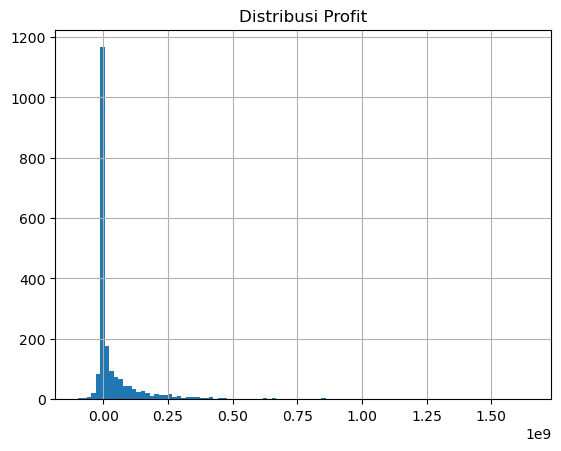

In [58]:
movie_release_rating['profit'].hist(bins = 100)
plt.title("Distribusi Profit")

In [59]:
movie_release_rating['profit'].describe()

count    2.052000e+03
mean     4.562603e+07
std      1.177794e+08
min     -9.830110e+07
25%      0.000000e+00
50%      0.000000e+00
75%      3.791531e+07
max      1.645034e+09
Name: profit, dtype: float64

In [69]:
movie_release_rating['profit'].quantile(0.6)

3163497.3999999994

hanya ada sekitar 60% film yang mampu memberikan profit, sementara sisanya hanya modalnya yang kembali.

In [60]:
import seaborn as sns

<Axes: >

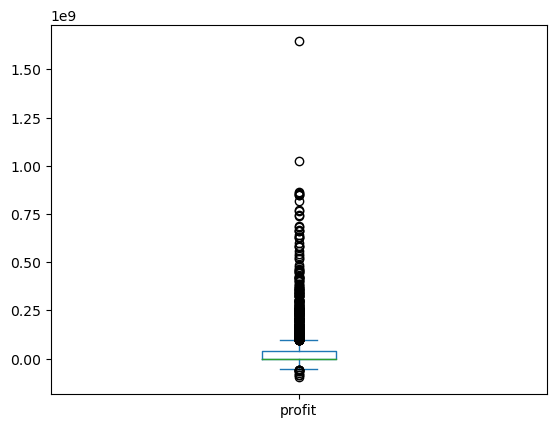

In [64]:
movie_release_rating["profit"].plot(kind = "box")

<Axes: xlabel='profit'>

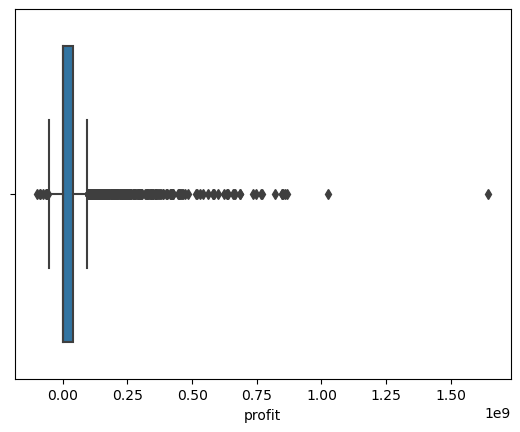

In [65]:
sns.boxplot(data=movie_release_rating, x ='profit')

<Axes: xlabel='budget'>

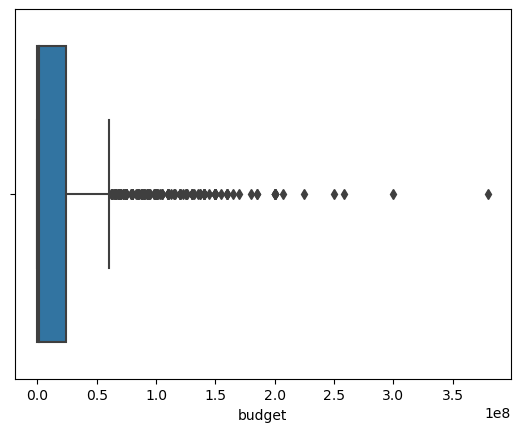

In [66]:
sns.boxplot(data=movie_release_rating, x ='budget')

<Axes: xlabel='runtime', ylabel='profit'>

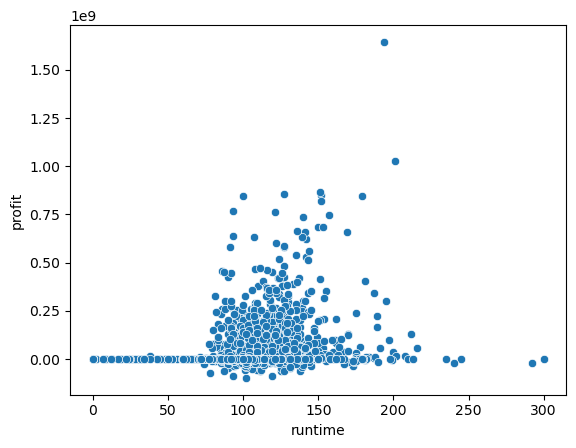

In [70]:
sns.scatterplot(data=movie_release_rating, x='runtime', y='profit')

In [75]:
movie_release_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2051
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  2052 non-null   bool   
 1   belongs_to_collection  2052 non-null   object 
 2   budget                 2052 non-null   int64  
 3   genres                 2052 non-null   object 
 4   homepage               2052 non-null   object 
 5   id                     2052 non-null   int64  
 6   imdb_id                2052 non-null   object 
 7   original_language      2052 non-null   object 
 8   original_title         2052 non-null   object 
 9   overview               2052 non-null   object 
 10  popularity             2052 non-null   float64
 11  poster_path            2052 non-null   object 
 12  production_companies   2052 non-null   object 
 13  production_countries   2052 non-null   object 
 14  release_date           2052 non-null   object 
 15  reve

In [76]:
rating_movies = rating.groupby("movieId", as_index = False)["rating"].median()

<Axes: xlabel='rating', ylabel='Count'>

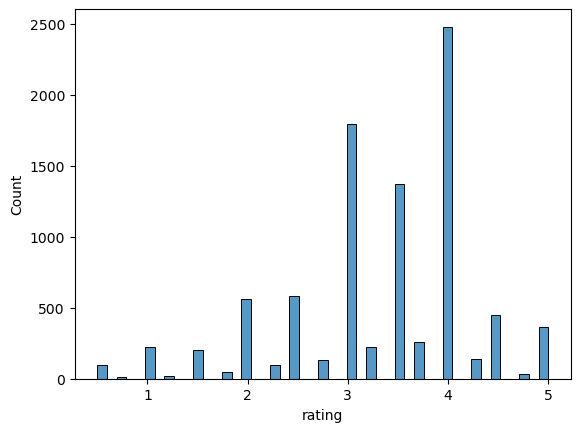

In [78]:
sns.histplot(data = rating_movies,
                x = "rating")

In [79]:
rating_movies["good_movies"] = rating_movies["rating"] >= 3

<Axes: ylabel='good_movies'>

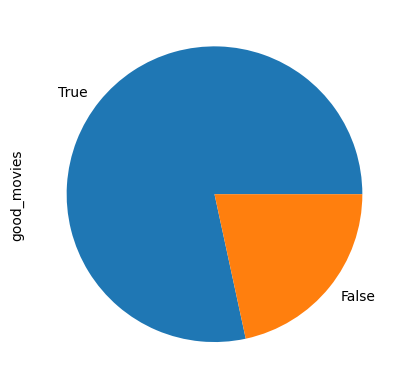

In [80]:
rating_movies["good_movies"].value_counts().plot(kind = "pie")

In [86]:
new_df = movie_release_rating.merge(rating_movies,
                        left_on = "id",
                        right_on = "movieId",
                        how = "inner")

<Axes: xlabel='profit', ylabel='Count'>

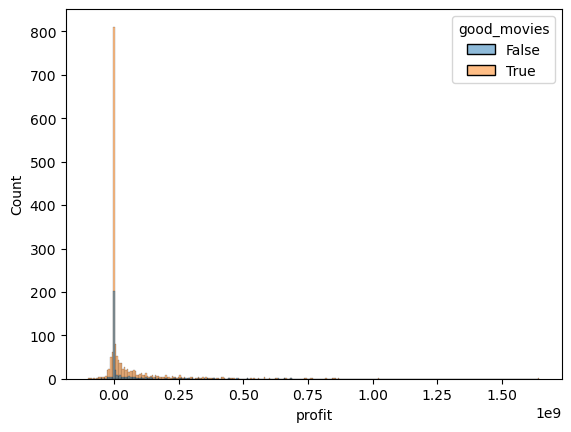

In [87]:
sns.histplot(data = new_df,
             x = "profit",
             hue = "good_movies")

<Axes: xlabel='rating', ylabel='profit'>

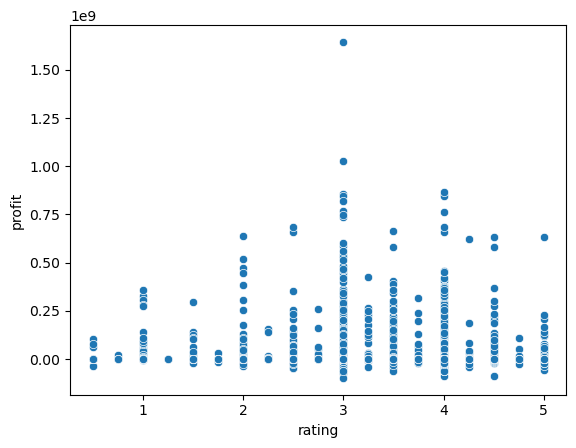

In [88]:
sns.scatterplot(data = new_df,
             x = "rating",
                y = "profit")